1
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.15mA.IRR
19.327822345972834


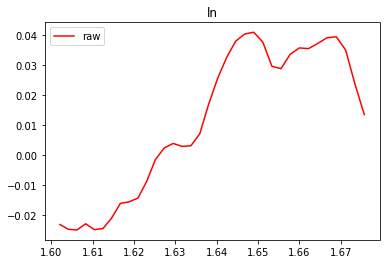

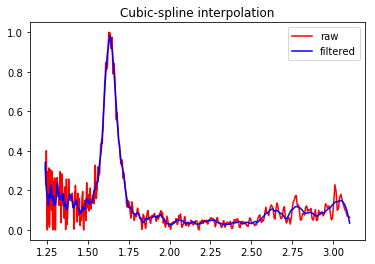

2
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.25mA-2.IRR
27.822082938325877


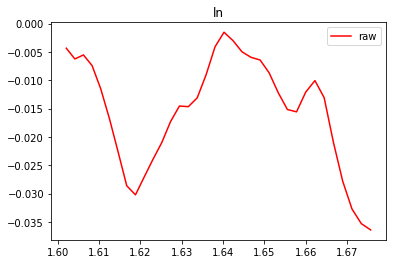

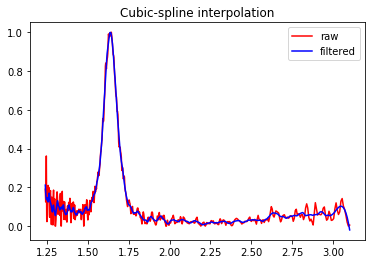

3
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.25mA-3.IRR
26.45737271627928


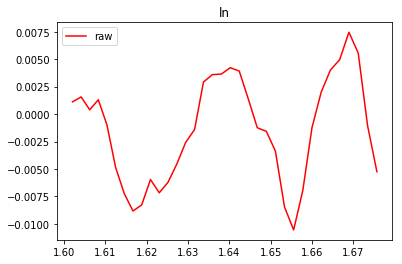

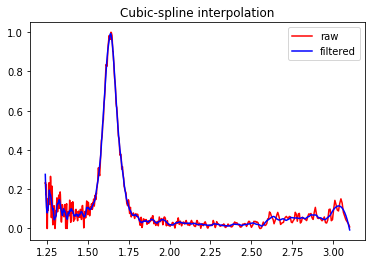

4
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.25mA.IRR
26.850000000000023


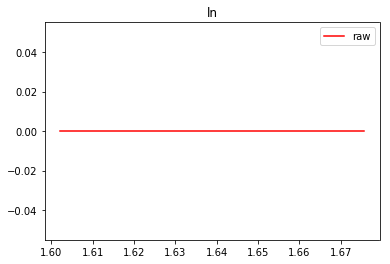

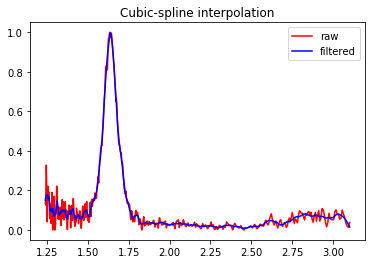

5
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.2mA-4.IRR
23.891329710508444


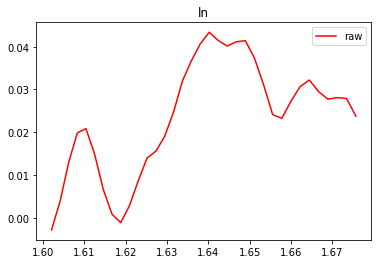

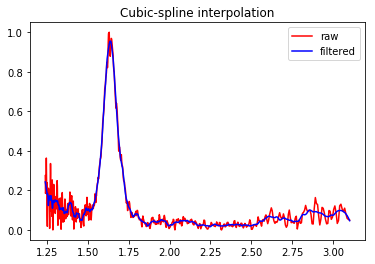

6
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.2mA.IRR
29.706555276767972


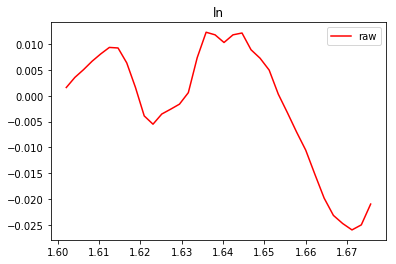

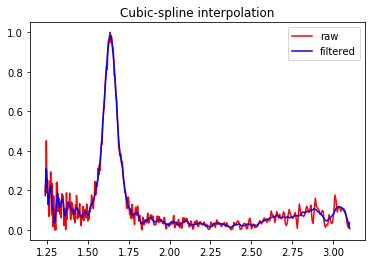

7
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-10mA-15s.IRR
58.82632475719237


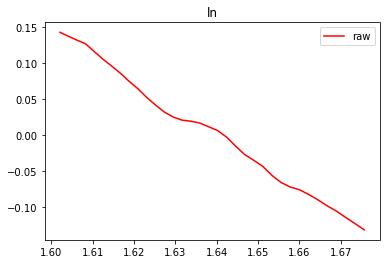

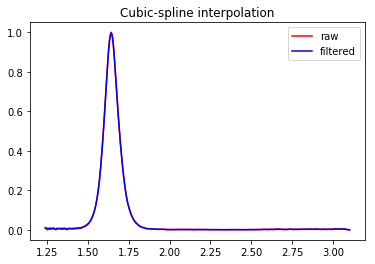

8
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-10mA-30s.IRR
61.28823799730225


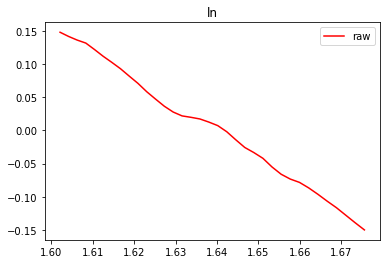

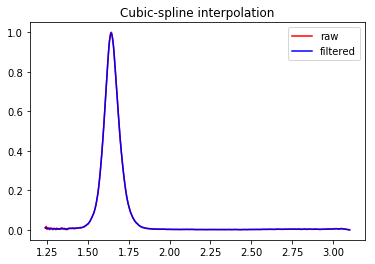

9
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-10mA-45s.IRR
63.86005232621426


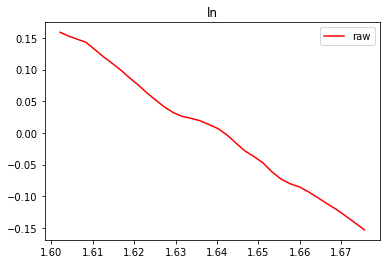

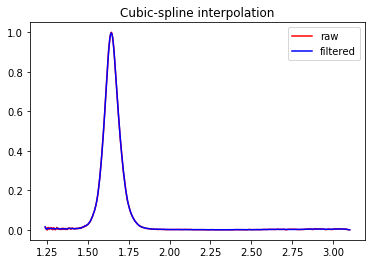

10
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-10mA-5s.IRR
49.467317783595945


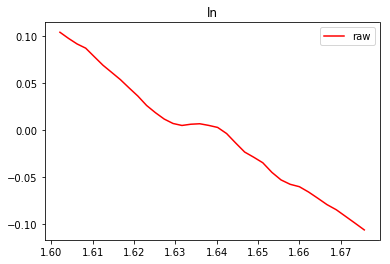

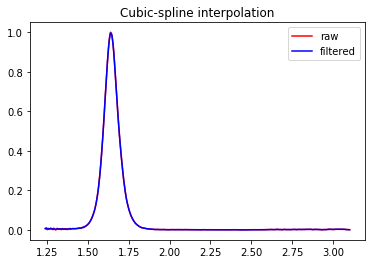

11
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-10mA-60s.IRR
64.27456655006597


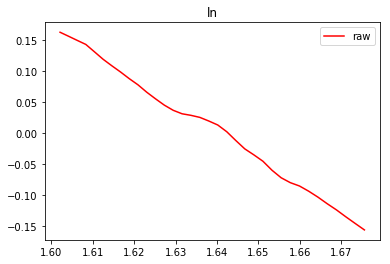

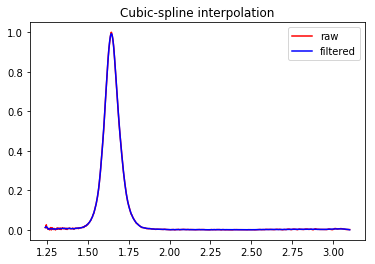

12
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-2.5mA-20s.IRR
39.85080888363177


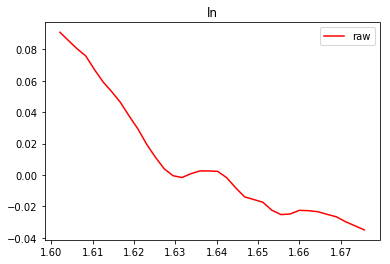

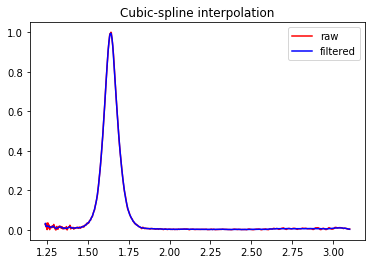

13
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-2.5mA-2s.IRR
39.312339102301166


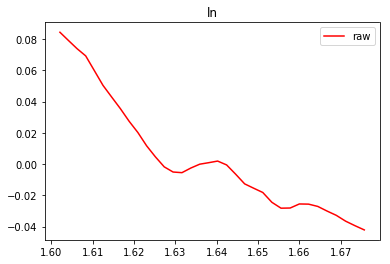

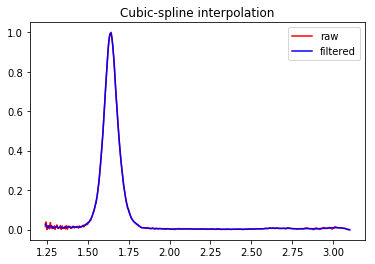

14
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-2.5mA-30s.IRR
39.94500210409092


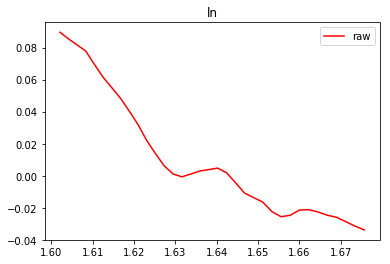

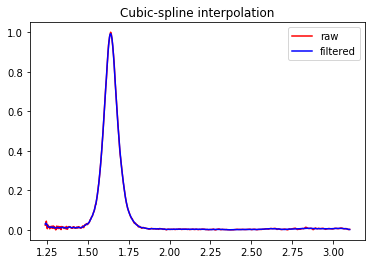

15
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-2.5mA-50s.IRR
39.80871537346184


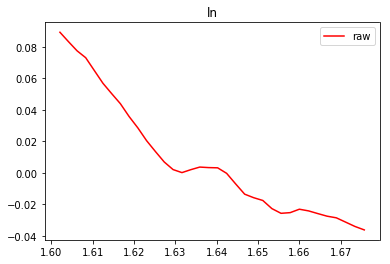

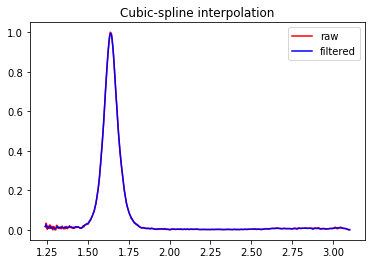

16
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-2.5mA-60s.IRR
39.58705143397157


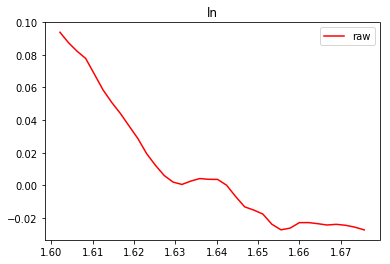

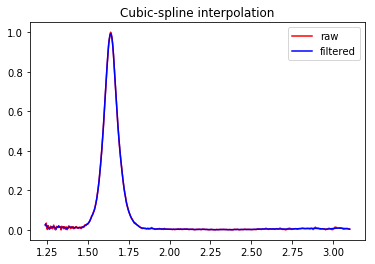

17
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-20mA-15s.IRR
85.84866397415936


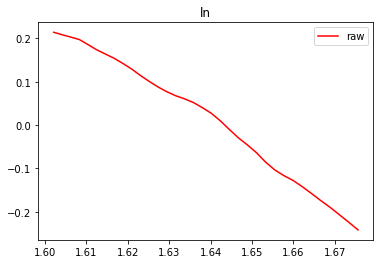

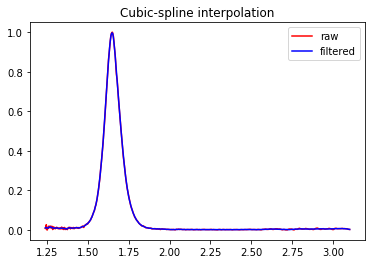

18
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-20mA-2s.IRR
56.969921210332814


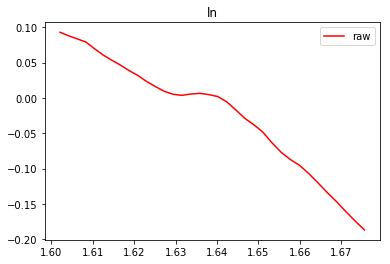

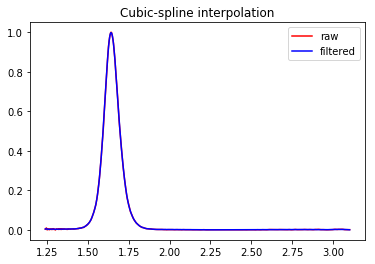

19
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-20mA-7s.IRR
82.45469785284718


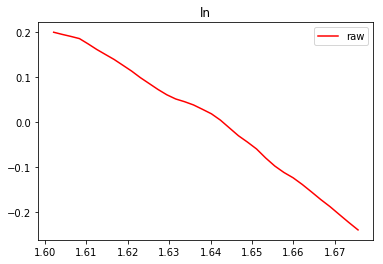

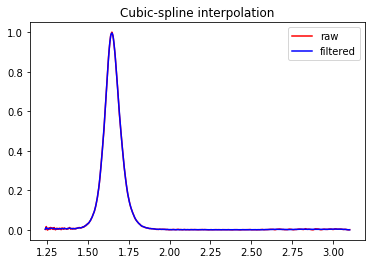

20
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-10s.IRR
42.68745928235529


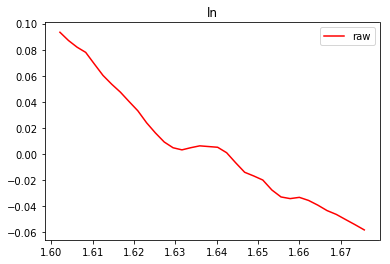

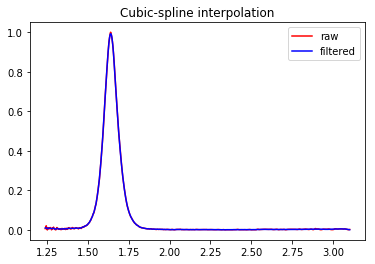

21
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-20s.IRR
44.33157896607133


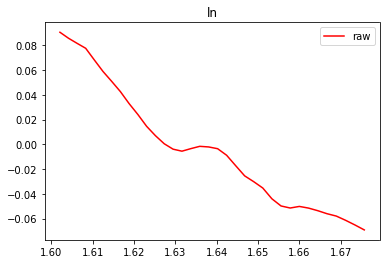

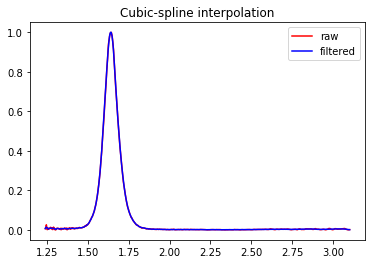

22
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-2s.IRR
40.017784550266924


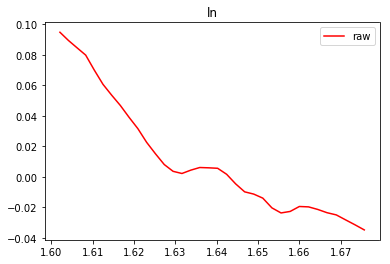

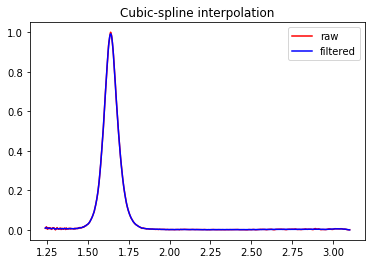

23
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-30s.IRR
46.3309027560465


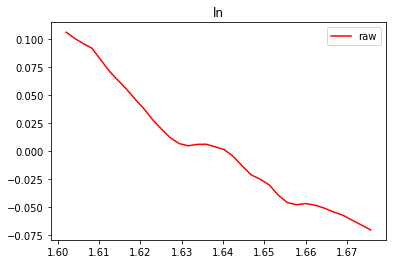

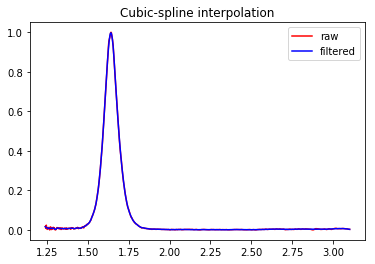

24
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-45s.IRR
46.460832449136205


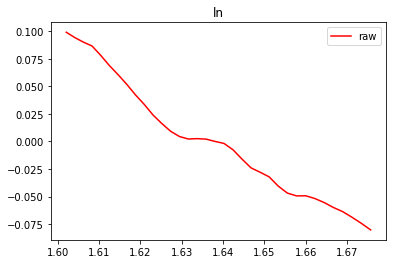

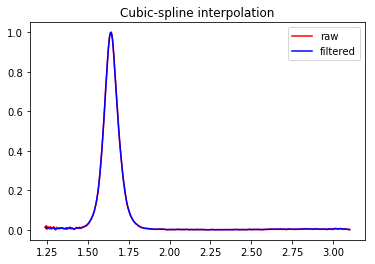

25
/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-5mA-60s.IRR
47.57374916772238


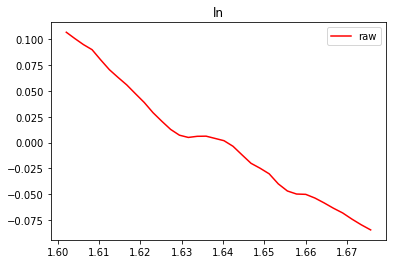

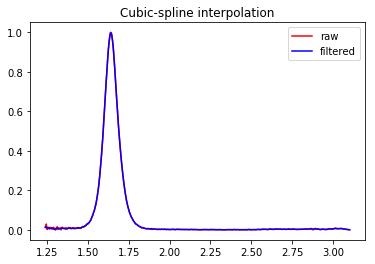

[19.327822345972834, 27.822082938325877, 26.45737271627928, 26.850000000000023, 23.891329710508444, 29.706555276767972, 58.82632475719237, 61.28823799730225, 63.86005232621426, 49.467317783595945, 64.27456655006597, 39.85080888363177, 39.312339102301166, 39.94500210409092, 39.80871537346184, 39.58705143397157, 85.84866397415936, 56.969921210332814, 82.45469785284718, 42.68745928235529, 44.33157896607133, 40.017784550266924, 46.3309027560465, 46.460832449136205, 47.57374916772238]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

from scipy.signal import savgol_filter

from math import log


import os,glob

from scipy.stats import linregress




#********************************************
# select the reference spectrum at room temperature as y_LED_ref_filter


x_LED_ref = []                            #list to hold captured words
y_LED_ref = []
with open('/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/#10-withoutD-1mm-0.25mA.IRR', 'r') as f:        #open the file for reading
    for line in f:                           #Go line by line
        x_LED_ref.append(line.split()[0]) #add to the list last word
        y_LED_ref.append(line.split()[1]) #add to the list last word
                
x_LED_ref=[float(i) for i in x_LED_ref]
y_LED_ref=[float(i) for i in y_LED_ref]


length=len(x_LED_ref)


bgtemp=[0]
for i in range(length):
    if y_LED_ref[i]<0:
        bgtemp.append(y_LED_ref[i])
    
bg=min(bgtemp)

for i in range(length):
    y_LED_ref[i]=y_LED_ref[i]-bg
    
    
    
maxLED=max(y_LED_ref)






for i in range(length):
    if maxLED==0:
        pass
    else:
        y_LED_ref[i]=y_LED_ref[i]/maxLED

y_LED_ref_filter = savgol_filter(y_LED_ref, 21, 3) # window size 51, polynomial order 3

y_LED_ref_filter=[float(i) for i in y_LED_ref_filter]
plt.figure()
#*****************************************

#Export all files in the folder, as y_LED_filter

folder_path = '/Users/lucas/Google Drive/data/LED/20191130/1mm/temperature-Without D Cooling/process data/'


count_file=0

Temperature_extracted=[]

for filename in glob.glob(os.path.join(folder_path, '*.IRR')):
    x_LED = []                            #list to hold captured words
    y_LED = []
    with open(filename, 'r') as f:
        for line in f:                           #Go line by line
            x_LED.append(line.split()[0]) #add to the list last word
            y_LED.append(line.split()[1]) #add to the list last word
    
    x_LED=[float(i) for i in x_LED]
    y_LED=[float(i) for i in y_LED]
    
    
    
    count_file=count_file+1
    
    save_file_path=os.path.join(folder_path,'processed data')
 
            

    
    
    
    length=len(x_LED)
    
    
    
    bgtemp=[0]
    for i in range(length):
        if y_LED[i]<0:
            bgtemp.append(y_LED[i])
    
    bg=min(bgtemp)

    for i in range(length):
        y_LED[i]=y_LED[i]-bg
    
    

    maxLED=max(y_LED)
    
    Ex_LED=np.zeros(length)
    

    for i in range(length):
        if maxLED==0:
            pass
        else:
            y_LED[i]=y_LED[i]/maxLED # normalize spectrum
            Ex_LED[i]=1240/x_LED[i]
        
        

    y_LED_filter = savgol_filter(y_LED, 21, 3) # window size 51, polynomial order 3, smooth data
    y_LED_filter=[float(i) for i in y_LED_filter]

    
    temp=np.zeros(length)
    for i in range(length):
        if y_LED_ref_filter[i]<0 or y_LED_filter[i]<0 or y_LED_filter[i]==0:
            pass
        elif y_LED_ref_filter[i]/y_LED_filter[i]<=0:
            pass
        else:
            temp[i]=log(y_LED_ref_filter[i]/y_LED_filter[i])
    
    
    res = [idx for idx, val in enumerate(Ex_LED) if 1.677 > val > 1.6] 
    
    Ex_LED_fit=[]
    y_LED_fit=[]
    temp_fit=[]
    for j in res:
        Ex_LED_fit.append(Ex_LED[j])
        y_LED_fit.append(y_LED[j])
        temp_fit.append(temp[j])
   


    slope, intercept, r_value, p_value, std_err = linregress(Ex_LED_fit, temp_fit)
    
    T_ref=300

    Kb=8.61733326e-5
    T_pulse=1/(slope*Kb+1/T_ref)-273.15
    
    Temperature_extracted.append(T_pulse)
    
    print (count_file)
    print (filename)
    print (T_pulse)
    
    with open(os.path.join(save_file_path,'count.txt'), "a") as myfile:
        myfile.write(str(count_file)+"\n")
        myfile.write(filename+"\n")  
        myfile.write(str(T_pulse)+"\n")
        myfile.write("\n")

        
        
    with open(os.path.join(save_file_path,'{0}.txt').format(count_file), "w") as f:
        for s in y_LED_filter:
            f.write(str(s) +"\n")

    plt.plot(Ex_LED_fit, temp_fit, 'r')
    
    plt.legend(['raw', 'filtered', 'True'])
    #plt.axis([-0.05, 6.33, -1.05, 1.05])
    plt.title('ln')
    plt.show()
    
    plt.figure()
    # plt.plot(x_LED, y_LED, 'r')
    plt.plot(Ex_LED, y_LED, 'r', Ex_LED, y_LED_filter, 'b')
    plt.legend(['raw', 'filtered', 'True'])
    plt.title('Cubic-spline interpolation')
    plt.show()    

with open(os.path.join(save_file_path,'temperature.txt'), "w") as myfile:
    myfile.write(str(Temperature_extracted)+"\n")  
print(Temperature_extracted)

        


In [49]:


wavelength=[400,500,600]



real=[2,50,100]

measured=[2,30,50]


index=[0,1,2]

for j in [0,1,2]:
    real[j]=real[j]*3

factor=[0,0,0]

calibrated=[0,0,0]
raw=[4,6,8]


# for i in [0,1,2,3]:
factor[0]=real[0]/measured[0]
factor[1]=real[1]/measured[1]
factor[2]=real[2]/measured[2]


calibrated[0]=raw[0]*factor[0]   
calibrated[1]=raw[1]*factor[1]   
calibrated[2]=raw[2]*factor[2]   

print (calibrated)


[12.0, 30.0, 48.0]
